In [29]:
import numpy as np
from devito import *
import matplotlib.pyplot as plt 

In [30]:
grid = Grid(shape=(100, 100))

In [31]:
# Define the constants
k1 = 1e-4
k2 = 1e-5
P_res = 100

In [32]:
# Time step parameters
nt1 = 2600  # number of time steps
dt = 120    # time interval in seconds/

In [33]:
P = TimeFunction(name='P', grid=grid, space_order=2, save=nt1)

In [34]:
P.data[:] = 100
center_index = (grid.shape[0] // 2, grid.shape[1] // 2)
P.data[0, center_index[0], center_index[1]] = 0

In [35]:
eqn = Eq(P.dt, k1 * P.laplace + k2 * (P_res - P))

In [36]:
# import Neumann BC


In [37]:
# iteration format and force term
step = Eq(P.forward, solve(eqn, P.forward))
center_index = (grid.shape[0] // 2, grid.shape[1] // 2)
center_constraint = Eq(P[grid.time_dim + 1, center_index[0], center_index[1]], 0)

In [38]:
op = Operator([step, center_constraint])

In [39]:
np.shape(P.data)

(2600, 100, 100)

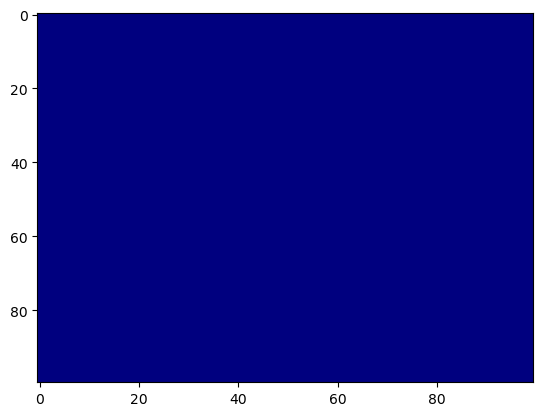

In [40]:
plt.figure()
plt.imshow(P.data[500,:,:], cmap='jet', aspect='auto')
plt.show()

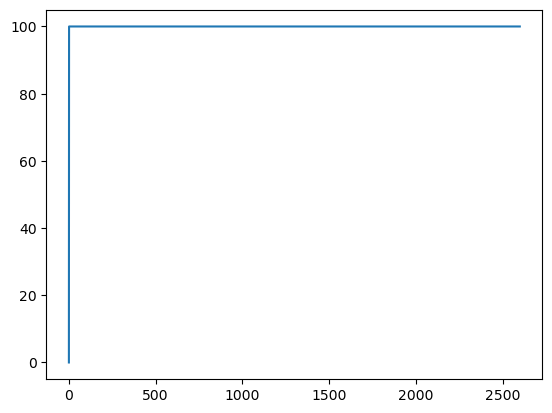

In [41]:
plt.figure()
plt.plot(P.data[:,50,50], label='center')
plt.show()